# distance viz preprocessing 

### utils

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopy.distance

In [5]:
def calculate_distance(lat1, lon1, lat2, lon2):
    """
    calculate the distance in miles 
    between lat and lon
    """
    return geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).miles

### preprocessing

In [8]:
loc = pd.read_csv('data/locations_key.csv').drop(columns='address')
dst = pd.read_csv('data/distances.csv')

# TEMPORARY: limit size of csv because i haven't filled in dates too far back
dst = dst[dst.day_int > 20210914]
dst = dst.merge(loc, how='left', left_on='imo', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'imo_lat',
    'lon':'imo_lon'
})
dst = dst.merge(loc, how='left', left_on='jwu', right_on='location').drop(columns='location')
dst = dst.rename(columns={
    'lat':'jwu_lat',
    'lon':'jwu_lon'
})

In [9]:
dst['distance'] = dst.apply(lambda row: calculate_distance(row.imo_lat, row.imo_lon, row.jwu_lat, row.jwu_lon), axis=1)

In [10]:
dst['day_int'] = dst.year*10000 + dst.month*100 + dst.day
dst['log_distance'] = np.log(dst.distance + 1)
dst = dst[dst.day_int > 20200913]

In [11]:
dst.head()

,date,pretty_date,imo,jwu,description,year,month,day,day_int,Unnamed: 9,Unnamed: 10,imo_lat,imo_lon,jwu_lat,jwu_lon,distance,log_distance
0,29-07-2022,"Fri, Jul 29, 22",The Bluffs,The Bluffs,Jyalu visits Imo in Carlsbad,2022,7,29,20220729,NaN,NaN,33.178038,-117.322188,33.178038,-117.322188,0.000000,0.000000
1,28-07-2022,"Thu, Jul 28, 22",The Bluffs,Sharon,the sponless time,2022,7,28,20220728,NaN,NaN,33.178038,-117.322188,42.107550,-71.153158,2572.899779,7.853177
2,27-07-2022,"Wed, Jul 27, 22",The Bluffs,Sharon,the sponless time,2022,7,27,20220727,NaN,NaN,33.178038,-117.322188,42.107550,-71.153158,2572.899779,7.853177
3,26-07-2022,"Tue, Jul 26, 22",The Bluffs,Sharon,the sponless time,2022,7,26,20220726,NaN,NaN,33.178038,-117.322188,42.107550,-71.153158,2572.899779,7.853177
4,25-07-2022,"Mon, Jul 25, 22",The Bluffs,Sharon,the sponless time,2022,7,25,20220725,NaN,NaN,33.178038,-117.322188,42.107550,-71.153158,2572.899779,7.853177


### initial plot idea

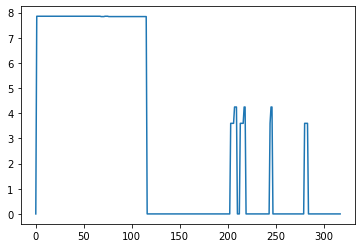

In [12]:
plt.plot(dst.log_distance)

### output data ready for viz :) 

In [13]:
dst.to_csv(r'data/processed.csv')